In [1]:

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [67]:
# Loading the data into dataframe
df= pd.read_csv('train.csv', index_col='id')
df_test=pd.read_csv('test.csv', index_col='id')

In [3]:

print(f'The shape of the train data: {df.shape}')
print(f'The shape of the test data : {df_test.shape}')

The shape of the train data: (900000, 32)
The shape of the test data : (700000, 31)


In [4]:
# checking for null values

# print(df.isnull().sum())
# print(df_test.isnull().sum())  # There are no null values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900000 entries, 0 to 899999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   f_00    900000 non-null  float64
 1   f_01    900000 non-null  float64
 2   f_02    900000 non-null  float64
 3   f_03    900000 non-null  float64
 4   f_04    900000 non-null  float64
 5   f_05    900000 non-null  float64
 6   f_06    900000 non-null  float64
 7   f_07    900000 non-null  int64  
 8   f_08    900000 non-null  int64  
 9   f_09    900000 non-null  int64  
 10  f_10    900000 non-null  int64  
 11  f_11    900000 non-null  int64  
 12  f_12    900000 non-null  int64  
 13  f_13    900000 non-null  int64  
 14  f_14    900000 non-null  int64  
 15  f_15    900000 non-null  int64  
 16  f_16    900000 non-null  int64  
 17  f_17    900000 non-null  int64  
 18  f_18    900000 non-null  int64  
 19  f_19    900000 non-null  float64
 20  f_20    900000 non-null  float64
 21  f_21    90

In [5]:
## checking the column names
df.columns

Index(['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07', 'f_08',
       'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17',
       'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26',
       'f_27', 'f_28', 'f_29', 'f_30', 'target'],
      dtype='object')

In [6]:
print(df.dtypes)

f_00      float64
f_01      float64
f_02      float64
f_03      float64
f_04      float64
f_05      float64
f_06      float64
f_07        int64
f_08        int64
f_09        int64
f_10        int64
f_11        int64
f_12        int64
f_13        int64
f_14        int64
f_15        int64
f_16        int64
f_17        int64
f_18        int64
f_19      float64
f_20      float64
f_21      float64
f_22      float64
f_23      float64
f_24      float64
f_25      float64
f_26      float64
f_27       object
f_28      float64
f_29        int64
f_30        int64
target      int64
dtype: object


In [52]:
from sklearn.preprocessing import OrdinalEncoder

In [56]:
df.f_27

id
0         ABABDADBAB
1         ACACCADCEB
2         AAAEABCKAD
3         BDBBAACBCB
4         BDBCBBCHFE
             ...    
899995    BABBCBBBED
899996    BBBGBBDQBE
899997    AEBEDBBHBA
899998    ADBAAADDAE
899999    BCAACADSCE
Name: f_27, Length: 900000, dtype: object

In [62]:

# df.select_dtypes(include=[float]).columns.values.tolist()
# df.select_dtypes(include=[object]).columns.values.tolist()
# df.select_dtypes(include=[int]).columns.values.tolist()

['f_07',
 'f_08',
 'f_09',
 'f_10',
 'f_11',
 'f_12',
 'f_13',
 'f_14',
 'f_15',
 'f_16',
 'f_17',
 'f_18',
 'f_29',
 'f_30',
 'target']

In [7]:
# Displauing the statistics

print(df.describe())
print(f"{'*'*10} Test Data{'*'*10}")
print(df_test.describe())

                f_00           f_01           f_02           f_03  \
count  900000.000000  900000.000000  900000.000000  900000.000000   
mean       -0.000286       0.001165       0.001174      -0.001368   
std         0.998888       0.999193       1.000514       1.000175   
min        -4.599856      -4.682199      -4.642676      -4.658816   
25%        -0.675490      -0.675162      -0.674369      -0.676114   
50%         0.001144       0.002014       0.002218      -0.002227   
75%         0.674337       0.675021       0.677505       0.672544   
max         4.749301       4.815699       4.961982       4.454920   

                f_04           f_05           f_06           f_07  \
count  900000.000000  900000.000000  900000.000000  900000.000000   
mean       -0.000571       0.000284      -0.000709       2.031460   
std         1.000167       0.999875       0.999942       1.656172   
min        -4.748501      -4.750214      -4.842919       0.000000   
25%        -0.675909      -0.6734

<AxesSubplot:xlabel='target', ylabel='count'>

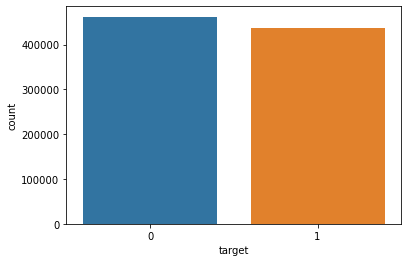

In [8]:
sns.countplot(x='target', data=df)
## the classes are more or less 

<AxesSubplot:>

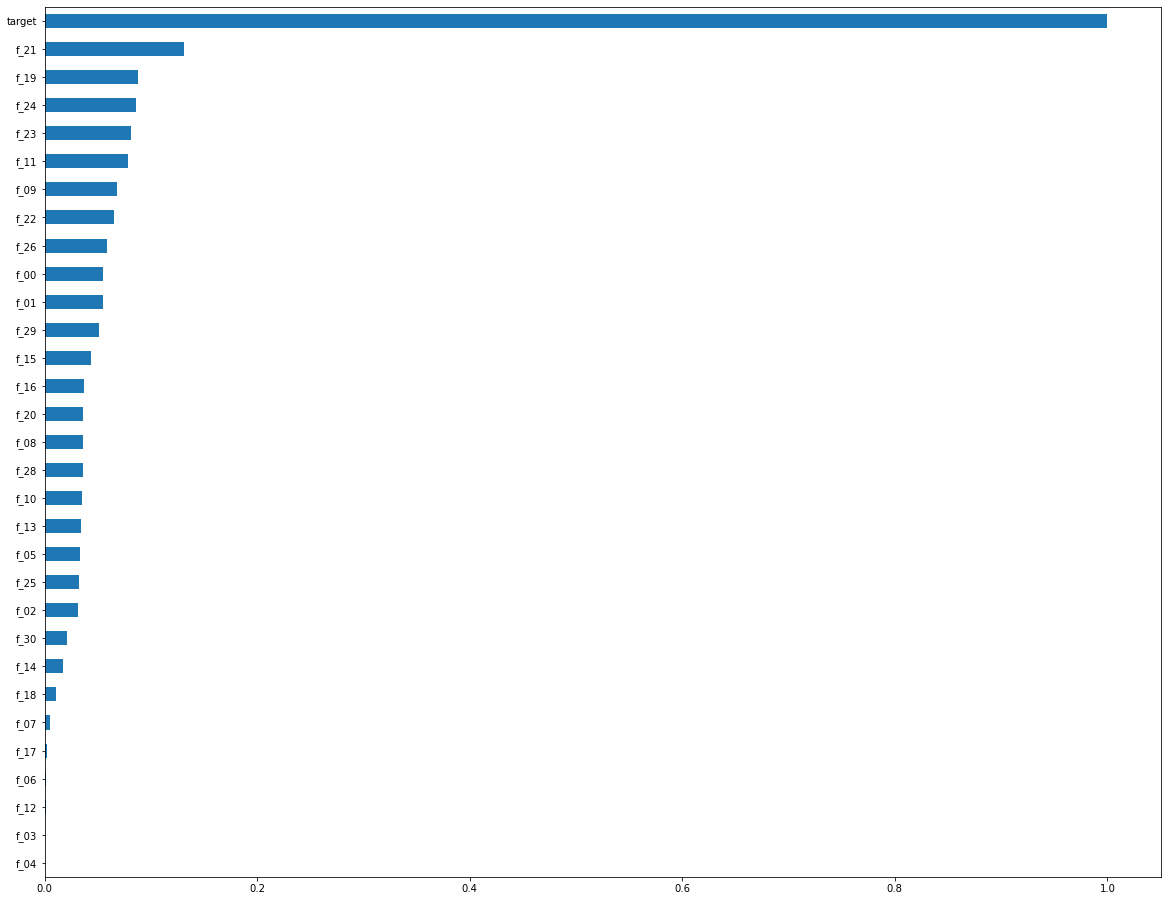

In [9]:
plt.figure(figsize=(20,16))
df.corr()['target'].abs().sort_values().plot.barh()

<AxesSubplot:>

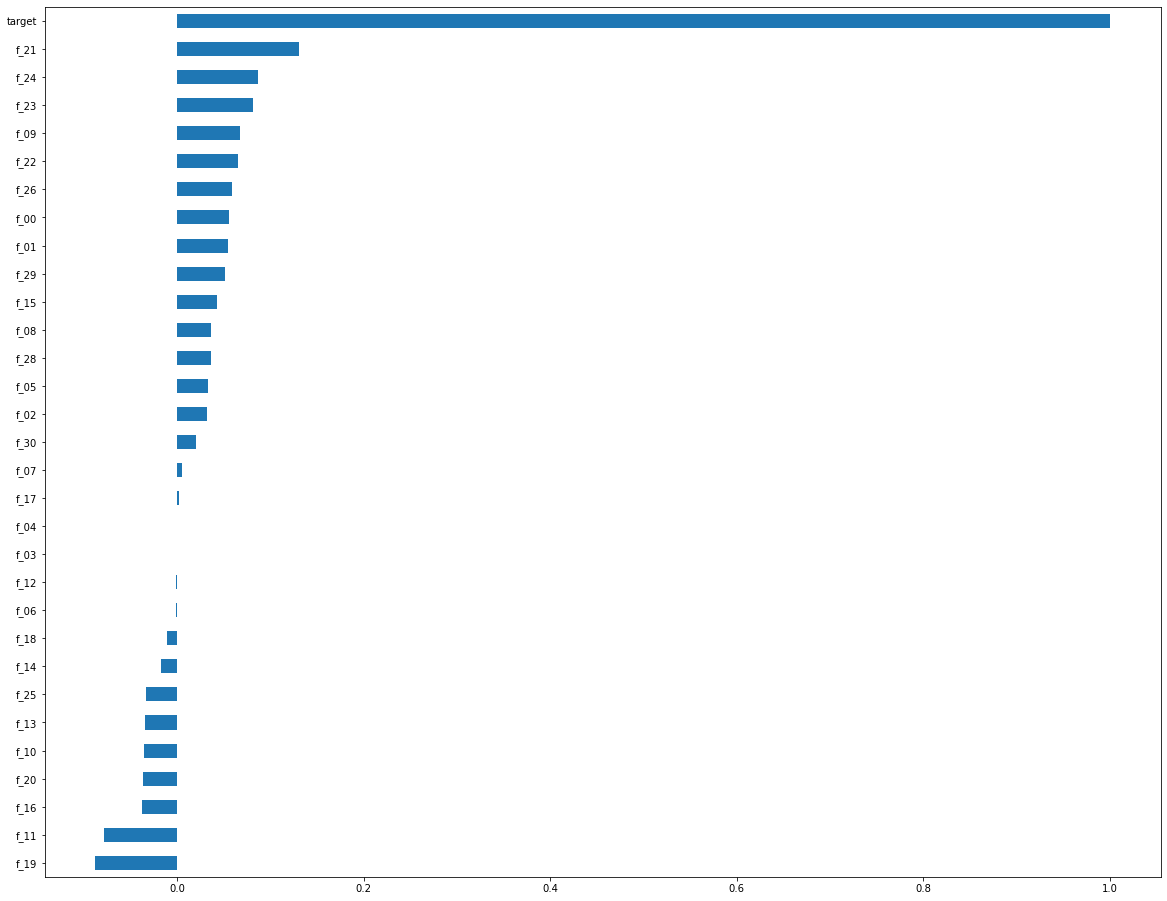

In [11]:
plt.figure(figsize=(20,16))
df.corr()['target'].sort_values().plot.barh()


In [68]:
# dropping the columns that are less correlated to the target
df= df.drop(columns=['f_03', 'f_04', 'f_07', 'f_16', 'f_17'])
df_test= df_test.drop(columns=['f_03', 'f_04', 'f_07', 'f_16', 'f_17'])

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X, y=df.drop('target', axis=1), df['target']

num_vars=X.select_dtypes(exclude=[object]).columns.values.tolist()
#cat_var=X.select_dtypes(include=[object]).columns.values.tolist()

In [71]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
#from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
#from lightgbm              import LGBMClassifier
from sklearn.model_selection        import train_test_split
from sklearn.metrics                import accuracy_score, balanced_accuracy_score
import time

In [72]:
num_4_treeModels = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

   # cat_object_type= Pipeline(steps=[
    #('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    #])
  
tree_prepro = ColumnTransformer(transformers=[
    ('num', num_4_treeModels, num_vars),
    #('cat', cat_object_type, cat_vars),
    ], remainder='drop') 
    

In [73]:
tree_classifiers = {
   # "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Extra Trees":   ExtraTreesClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(random_state=0),
    #"AdaBoost":      AdaBoostClassifier(random_state=0),
    "Skl GBM":       GradientBoostingClassifier(random_state=0),
    #"Skl HistGBM":   HistGradientBoostingClassifier(random_state=0),
    "XGBoost":       XGBClassifier(),
    #"LightGBM":      LGBMClassifier(random_state=0),
    
    }
classifier= {name: make_pipeline(tree_prepro(num_vars), model) for name, model in
                                     tree_classifiers.items()}


TypeError: 'ColumnTransformer' object is not callable

In [ ]:
x_train, x_val, y_train, y_val= train_test_split(x, y, random_state=0,test_size=0.2, stratify=y) 
results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})
        
for model_name, model in classifier.items():
    
    start_time = time.time()
    model.fit(x_train, y_train)
    total_time = time.time() - start_time
        
    pred = model.predict(x_val)
    results = results.append({"Model":    model_name,
                              "Accuracy": accuracy_score(y_val, pred)*100,
                              "Bal Acc.": balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)

In [ ]:
results